#5.1.1: Introduction to Statistical Learning

- Learn the differences between supervised and unsupervised learning
- Learn to distinguish regression and classification
- Learn about the loss functions used in different settings

**Q: What is the difference between supervised and unsupervised learning?**
- A: Supervised learning matches inputs and outputs, whereas unsupervised learning discovers structure for inputs only.

**Q: What is the difference between regression and classification?**
- A: Regression results in continuous outputs, whereas classification results in categorical outputs.

**Q: What is the difference between least squares loss and  0−1  loss?**
- A: Least squares loss is used to estimate the expected value of outputs, whereas  0−1  loss is used to estimate the probability of outputs.

# 5.1.2: Generating Example Regression Data
- Learn how to generate example regression data using Python

In [1]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt 

In [3]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)

# Generate random variables on the 0-1 interval (times 10)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

print(x, y)

[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00
 3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00
 2.04452250e+00 8.78117436e+00 2.73875932e-01 6.70467510e+00
 4.17304802e+00 5.58689828e+00 1.40386939e+00 1.98101489e+00
 8.00744569e+00 9.68261576e+00 3.13424178e+00 6.92322616e+00
 8.76389152e+00 8.94606664e+00 8.50442114e-01 3.90547832e-01
 1.69830420e+00 8.78142503e+00 9.83468338e-01 4.21107625e+00
 9.57889530e+00 5.33165285e+00 6.91877114e+00 3.15515631e+00
 6.86500928e+00 8.34625672e+00 1.82882773e-01 7.50144315e+00
 9.88861089e+00 7.48165654e+00 2.80443992e+00 7.89279328e+00
 1.03226007e+00 4.47893526e+00 9.08595503e+00 2.93614148e+00
 2.87775339e+00 1.30028572e+00 1.93669579e-01 6.78835533e+00
 2.11628116e+00 2.65546659e+00 4.91573159e+00 5.33625451e-01
 5.74117605e+00 1.46728575e+00 5.89305537e+00 6.99758360e+00
 1.02334429e+00 4.14055988e+00 6.94400158e+00 4.14179270e+00
 4.99534589e-01 5.358964

Text(0, 0.5, 'y')

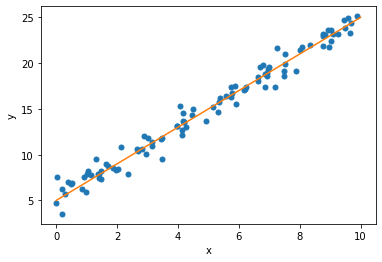

In [4]:
plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0,10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")

In [5]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

In [7]:
x.mean(), y.mean()

(4.8587792760014565, 14.80142786070299)

#5.1.3: Simple Linear Regression
- Learn the basics of simple linear regression


**Q: What is the difference between  Y  (capital letter) and  y  (lowercase letter)?**
- A: Y  is a random variable, whereas  y  is a particular value.

The following code implements the residual sum of squares for this regression problem:

In [9]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
  return b_0 + b_1 *x

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
rss

81.540007425512

# 5.1.4: Least Squares Estimation in Code
- Learn how to use Python to compute the least squares estimate
- Learn how to use Python to estimate parameter values that minimize the residual sum of squares (RSS) criterion

In [15]:
rss = []
slopes = np.arange(-10, 15, 0.01)
for slope in slopes:
  rss.append(np.sum((y - beta_0 - slope * x) ** 2)) # compute_rss
rss[:10]

[465163.6265980302,
 464389.08137639664,
 463615.18165403913,
 462841.9274309581,
 462069.3187071535,
 461297.35548262496,
 460526.03775737283,
 459755.36553139694,
 458985.33880469744,
 458215.9575772741]

In [16]:
ind_min = np.argmin(rss)
ind_min

1200

In [22]:
print("Estimate for the slope: ", slopes[ind_min])

Estimate for the slope:  1.9999999999997442


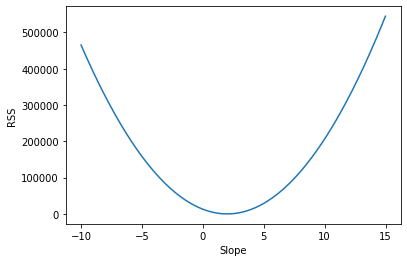

In [20]:
# Plot figure
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS");

**An additional note:**
- Note that in this case, the estimated value of the parameter (2.0) coincides with the true value of the parameter. 
- Generally, we do not know the underlying true value, but here it is known to us because we generated the data ourselves. 
- In practical settings, the estimated parameter value may not always match the true value.

Is the best estimate for the slope exactly the same as the true value 2 (when rounded to two decimal places)? 

Rerun the code but use a finer grid for the search by specifying `slopes = np.arange(-10, 15, 0.001).`



In [23]:
slopes = np.arange(-10, 15, 0.001)

rss = []
slopes = np.arange(-10, 15, 0.01)
for slope in slopes:
  rss.append(np.sum((y - beta_0 - slope * x) ** 2)) # compute_rss
rss[:10]

ind_min = np.argmin(rss)

print("Estimate for the slope: ", slopes[ind_min])

Estimate for the slope:  1.9999999999997442


# 5.1.5: Simple Linear Regression in Code
- Learn how to fit a simple linear regression model in Python

In [24]:
import statsmodels.api as sm

mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                    1.14e-75
Time:                        09:35:43   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           7.47e-82
Time:                        09:38:02   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

**Q: If the true intercept were negative but the regression model did not include an intercept term, what would that imply for the estimated slope?**
- A: The estimated slope would likely be lower than the true slope.

**Q: What does an estimated intercept term correspond to?**
- A: The estimated outcome when the input is set to zero

**Q: What does an estimated slope term correspond to?**
- A: The change in the estimated output when the input changes by one unit


**Q: You could create several datasets using different seed values and estimate the slope from each. These parameters will follow some distribution. What is the name used for this distribution?**
- A: The sampling distribution of the parameter estimates

**Q: If the  R^2  value is high, this indicates**
- A: a good fit: the residual sum of squares is low compared to the total sum of squares.


# 5.1.6: Multiple Linear Regression

- Learn the basics of multiple linear regression

Consider a multiple regression model with two inputs. The model predictions for the output  y  are given by

y^=β^_0 + x_1*β^_1 + x_2 * β^_2 

β1  and  β2  have been estimated from data. If we assume that  β^1=1 , and  β^2=3 .

**Q: What is the interpretation of  β^1 ?**

-  A: The change in the predicted outcome if  x1  is increased by 1, holding  x2  constant.

**Q: Consider the model and parameters in Question 1. For a given expected output prediction  y^ , what would be the expected change in the prediction value if you increased  x1  by 1, and decreased  x2  by 3?**

- A: -8


# 5.1.7: scikit-learn for Linear Regression
- Learn how to generate data from a simple model
- Learn how to fit a linear regression model using the scikit-learn library
- Learn how to evaluate the fit of a model by determining the  R2  statistic 

In [27]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)

x_1 = 10 * ss.uniform.rvs(size = n)
x_2 = 10 * ss.uniform.rvs(size = n)

y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0, scale = 1, size=n)

In [43]:
X = np.stack([x_1, x_2], axis = 1)
X[0:10]

array([[4.17022005e+00, 8.74822096e-01],
       [7.20324493e+00, 2.27309736e+00],
       [1.14374817e-03, 3.14376616e+00],
       [3.02332573e+00, 1.74765876e+00],
       [1.46755891e+00, 6.07094162e+00],
       [9.23385948e-01, 4.13586415e+00],
       [1.86260211e+00, 8.16351512e+00],
       [3.45560727e+00, 1.85130398e+00],
       [3.96767474e+00, 7.01876530e+00],
       [5.38816734e+00, 2.40355625e+00]])

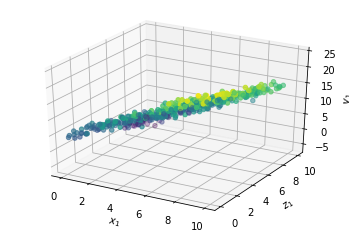

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_zlabel("$y_1$")
ax.set_ylabel("$z_1$");

In [46]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept = True)
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# beta_0
lm.intercept_

5.1540777637772495

In [49]:
# First value = beta_1, second value = beta_2
lm.coef_

array([ 1.9999379 , -1.02026449])

In [52]:
X_0 = np.array([2, 4])
lm.predict(X_0)

ValueError: ignored

In [53]:
X_0 = np.array([2, 4])
lm.predict(X_0.reshape(1, -1))

array([5.07289561])

In [54]:
# R^2 statistic

lm.score(X, y)

0.9798997316600129

**Q: In the section, we estimated the values of three parameters. Which of these estimates is closest to its true value?**

- A: beta_1

# 5.1.8: Assessing Model Accuracy

- Learn how to compute the mean squared error (MSE) to evaluate the performance of a regression model
- Learn how to separate data into training and test datasets
- Learn why both underfitting and overfitting can be problematic

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.5, 
                                                    random_state = 1)

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.9794930834681773

**Q: When evaluating the performance of a model in a regression setting on test data, which measure is most appropriate?**
- A: Test MSE

**Q: When evaluating the performance of a model in a classification setting on test data, which measure is most appropriate?**
- A: Test error rate

**Q: How do we expect an model that was overfit on the training data to perform on testing data?**
- A: It will likely perform worse on the testing data.

**Q: What is the primary motivation for splitting our model into training and testing data?**
- A: By evaluating how our model fits on unseen data, we can see how generalizable it is.
